In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_excel('./dataset/VMI_data.xls')

In [3]:
#시계열로 데이터 바꾸기
df['CRET_TIME'] = pd.to_datetime(df['CRET_TIME'],format='%Y%m%d%H%M')

In [4]:
def pre_processing(df) :
    part = df.iloc[:,:]
    for x in range(1,6) :
        part = part.drop(labels = part.iloc[:,x:10+x].columns,axis=1)
    
    return part

#개잘됨
df = pre_processing(df)
# df.columns

#pivoting
df_pivot = pd.pivot_table(df,index="Part Number",columns="CRET_TIME",values="D일 투입예정 수량(D일계획)")

In [5]:
print(df_pivot.shape)
df_pivot.head()

(117, 153)


CRET_TIME,2021-09-13 18:30:00,2021-09-14 06:05:00,2021-09-14 06:25:00,2021-09-14 06:34:00,2021-09-14 17:30:00,2021-09-15 06:20:00,2021-09-15 06:37:00,2021-09-15 16:33:00,2021-09-16 06:32:00,2021-09-16 06:38:00,...,2021-10-28 15:30:00,2021-10-28 16:26:00,2021-10-29 06:30:00,2021-10-29 06:32:00,2021-10-29 07:06:00,2021-10-29 12:34:00,2021-10-29 15:03:00,2021-10-29 15:38:00,2021-10-30 07:04:00,2021-11-01 07:03:00
Part Number,,,,,,,,,,,,,,,,,,,,,
Part 0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Part 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Part 10,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,23.0,23.0,...,178.0,178.0,178.0,156.0,156.0,156.0,156.0,156.0,156.0,104.0
Part 100,38.0,38.0,35.0,35.0,35.0,40.0,40.0,40.0,38.0,38.0,...,33.0,33.0,33.0,23.0,23.0,23.0,23.0,23.0,23.0,0.0
Part 101,0.0,0.0,0.0,0.0,0.0,77.0,77.0,77.0,78.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_pivot = df_pivot.fillna(method='ffill',axis=1) #전에 날짜것 참조해서 ffill
df_pivot.head()


CRET_TIME,2021-09-13 18:30:00,2021-09-14 06:05:00,2021-09-14 06:25:00,2021-09-14 06:34:00,2021-09-14 17:30:00,2021-09-15 06:20:00,2021-09-15 06:37:00,2021-09-15 16:33:00,2021-09-16 06:32:00,2021-09-16 06:38:00,...,2021-10-28 15:30:00,2021-10-28 16:26:00,2021-10-29 06:30:00,2021-10-29 06:32:00,2021-10-29 07:06:00,2021-10-29 12:34:00,2021-10-29 15:03:00,2021-10-29 15:38:00,2021-10-30 07:04:00,2021-11-01 07:03:00
Part Number,,,,,,,,,,,,,,,,,,,,,
Part 0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Part 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Part 10,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,23.0,23.0,...,178.0,178.0,178.0,156.0,156.0,156.0,156.0,156.0,156.0,104.0
Part 100,38.0,38.0,35.0,35.0,35.0,40.0,40.0,40.0,38.0,38.0,...,33.0,33.0,33.0,23.0,23.0,23.0,23.0,23.0,23.0,0.0
Part 101,0.0,0.0,0.0,0.0,0.0,77.0,77.0,77.0,78.0,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


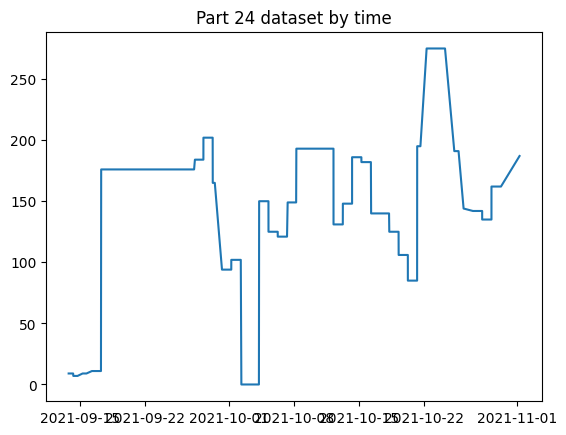

In [7]:
import random
seed = random.randint(1,153)

df_pivot_random = df_pivot.loc[f'Part {seed}']

plt.plot(df_pivot.loc[f'Part {seed}'],)
plt.title(f"Part {seed} dataset by time")
plt.show()

In [8]:
print(type(df_pivot_random))
print(df_pivot_random.shape)

<class 'pandas.core.series.Series'>
(153,)


In [9]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data.iloc[i:(i+seq_length)]
        y = data.iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 5
X, y = create_sequences(df_pivot_random, seq_length)

In [10]:
X.shape

(148, 5)

In [11]:
y.shape

(148,)

In [12]:
train_size = int(148*0.8)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+14], y[train_size:train_size+14]
X_test, y_test = X[train_size+14:], y[train_size+14:]

In [13]:
MIN = X_train.min()
MAX = X_train.max()

def MinMaxScale(array, min, max):

    return (array - min) / (max - min)

X_train = MinMaxScale(X_train, MIN, MAX)
y_train = MinMaxScale(y_train, MIN, MAX)

X_val = MinMaxScale(X_val, MIN, MAX)
y_val = MinMaxScale(y_val, MIN, MAX)

X_test = MinMaxScale(X_test, MIN, MAX)
y_test = MinMaxScale(y_test, MIN, MAX)

In [14]:
import torch

def make_tensor(array):
    return torch.from_numpy(array).float()

X_train = make_tensor(X_train)
y_train = make_tensor(y_train)

X_val = make_tensor(X_val)
y_val = make_tensor(y_val)

X_test = make_tensor(X_test)
y_test = make_tensor(y_test)

In [15]:
from torch import nn, optim

class LSTM(nn.Module):
    def __init__(self, n_features, n_hidden, seq_len, n_layers):
        super(LSTM, self).__init__()
        self.n_hidden = n_hidden
        self.seq_len = seq_len
        self.n_layers = n_layers
        self.lstm = nn.LSTM(
            input_size=n_features,
            hidden_size=n_hidden,
            num_layers=n_layers
        )
        self.linear = nn.Linear(in_features=n_hidden, out_features=1)
    def reset_hidden_state(self):
        self.hidden = (
            torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
            torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
        )
    def forward(self, sequences):
        lstm_out, self.hidden = self.lstm(
            sequences.view(len(sequences), self.seq_len, -1),
            self.hidden
        )
        last_time_step = lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
        y_pred = self.linear(last_time_step)
        return y_pred


In [16]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

def train_model(model, train_data, train_labels, val_data=None, val_labels=None, num_epochs=100, verbose = 10, patience = 10):
    loss_fn = torch.nn.L1Loss() #L1Loss=MAE Loss
    optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
    train_hist = []
    val_hist = []
    
    for t in range(num_epochs):
        epoch_loss = 0
        for idx, seq in enumerate(train_data): 
            model.reset_hidden_state() # seq 별 hidden state reset

            # train loss
            seq = torch.unsqueeze(seq, 0)
            y_pred = model(seq)
            loss = loss_fn(y_pred[0].float(), train_labels[idx]) # 1개의 step에 대한 loss

            # update weights
            optimiser.zero_grad()
            loss.backward()
            optimiser.step()

            epoch_loss += loss.item()
        train_hist.append(epoch_loss / len(train_data))

        if val_data is not None:
            with torch.no_grad():
                val_loss = 0
                for val_idx, val_seq in enumerate(val_data):
                    model.reset_hidden_state() # seq 별로 hidden state 초기화 

                    val_seq = torch.unsqueeze(val_seq, 0)
                    y_val_pred = model(val_seq)
                    val_step_loss = loss_fn(y_val_pred[0].float(), val_labels[val_idx])

                    val_loss += val_step_loss                
            val_hist.append(val_loss / len(val_data)) # val hist에 추가

            ## verbose 번째 마다 loss 출력 
            if t % verbose == 0:
                print(f'Epoch {t} train loss: {epoch_loss / len(train_data)} val loss: {val_loss / len(val_data)}')

            ## patience 번째 마다 early stopping 여부 확인
            if (t % patience == 0) & (t != 0):
                
                ## loss가 커졌다면 early stop
                if val_hist[t - patience] < val_hist[t] :
                    print('\n Early Stopping')
                    break
        elif t % verbose == 0:
            print(f'Epoch {t} train loss: {epoch_loss / len(train_data)}')
            
    return model, train_hist, val_hist

In [17]:
model_lstm = LSTM(
    n_features=1,
    n_hidden=4,
    seq_len=seq_length,
    n_layers=1)
print(model_lstm)

LSTM(
  (lstm): LSTM(1, 4)
  (linear): Linear(in_features=4, out_features=1, bias=True)
)


In [18]:
model_lstm, train_hist, val_hist = train_model(
    model_lstm,
    X_train,
    y_train,
    X_val,
    y_val,
    num_epochs=1000,
    verbose=10,
    patience=100)

c:\Users\rhcp1\anaconda3\envs\py_3_10_4\lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 0 train loss: 0.4949289703646959 val loss: 0.747604250907898
Epoch 10 train loss: 0.12043522879228753 val loss: 0.21662484109401703
Epoch 20 train loss: 0.04822542600459972 val loss: 0.11309843510389328
Epoch 30 train loss: 0.04775579538890871 val loss: 0.11717641353607178
Epoch 40 train loss: 0.046460797315684414 val loss: 0.12275071442127228
Epoch 50 train loss: 0.048664141256930464 val loss: 0.1316111981868744
Epoch 60 train loss: 0.04807287410406743 val loss: 0.12708771228790283
Epoch 70 train loss: 0.04815380530968561 val loss: 0.12816716730594635
Epoch 80 train loss: 0.04872601059407501 val loss: 0.14056816697120667
Epoch 90 train loss: 0.04829294152431569 val loss: 0.12947949767112732
Epoch 100 train loss: 0.049652179355843595 val loss: 0.1390301138162613
Epoch 110 train loss: 0.04712232682159392 val loss: 0.1280691921710968
Epoch 120 train loss: 0.05029520739690732 val loss: 0.13342784345149994
Epoch 130 train loss: 0.04970395669214806 val loss: 0.12853968143463135
Epoch 

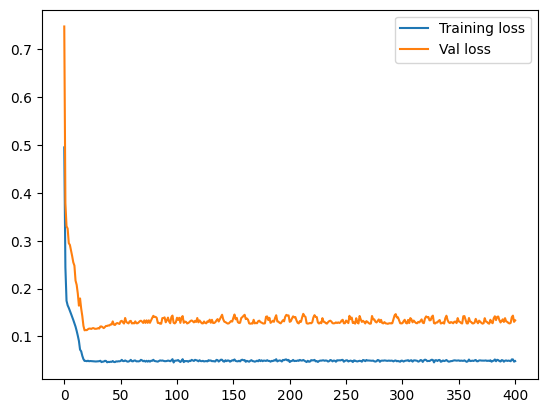

In [19]:
plt.plot(train_hist, label="Training loss")
plt.plot(val_hist, label="Val loss")
plt.legend()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_test, y_pred):
    print('* MAE:', mean_absolute_error(y_test, y_pred))
    print('* RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('* R_Square:', r2_score(y_test, y_pred))

In [21]:
pred_dataset = X_test

with torch.no_grad():
    preds_lstm = []
    for _ in range(len(pred_dataset)):
        model_lstm.reset_hidden_state()
        y_test_pred = model_lstm(torch.unsqueeze(pred_dataset[_], 0))
        pred = torch.flatten(y_test_pred).item()
        preds_lstm.append(pred)

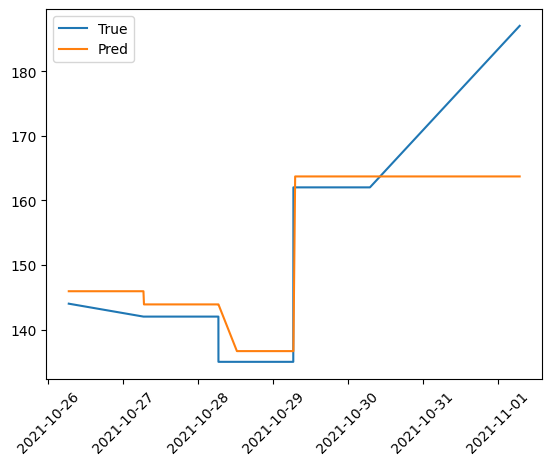

In [22]:
plt.plot(df_pivot_random.index[-len(y_test):], np.array(y_test) * MAX, label='True')
plt.plot(df_pivot_random.index[-len(preds_lstm):], np.array(preds_lstm) * MAX, label='Pred')
plt.xticks(rotation=45)
plt.legend()

In [23]:
evaluate(np.array(y_test)*MAX, np.array(preds_lstm)*MAX)

* MAE: 5.140742287039757
* RMSE: 9.069216309948166
* R_Square: 0.6329118684446089
